#Algoritmo: Punto fijo

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
error = lambda x_sig,x_ant,m: (m/(1-m))*np.abs(x_sig - x_ant)

In [73]:
# con f = f(x) y m tal que f'(x) <= m < 1
def punto_fijo(f,m,error_esperado,semilla):
  
  x_anterior = semilla
  x_siguiente = f(x_anterior)
  error_actual = error(x_siguiente,x_anterior,m)
  i = 1
  print("Paso ",i,"\tx: ",x_siguiente,"\tError: ",error_actual)
  while (error_actual > error_esperado):
    x_anterior = x_siguiente
    x_siguiente = f(x_anterior)
    error_actual = error(x_siguiente,x_anterior,m)
    i+=1
    print("Paso ",i,"\tx: ",x_siguiente,"\tError: ",error_actual)
  print("\nPasos totales: ",i,"\t valor estimado de x: ",x_siguiente,"\tError: ",error_actual)

#Ejercicio 4

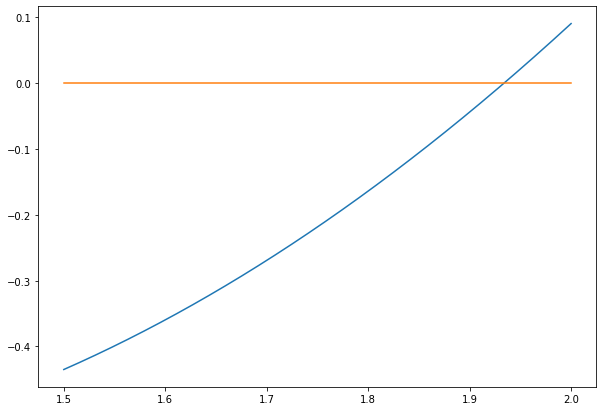

In [74]:
#funcion original
f = lambda x: (x**2)/4-np.sin(x)
x = np.linspace(1.5,2,1000)
y = f(x)
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x,len(x)*[0])
plt.show()

##Primer variante: sumar x a ambos lados

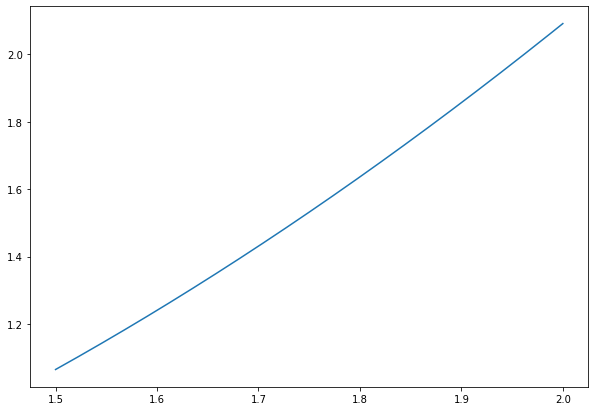

In [75]:
# x^2/4 - sen(x) => x = (x^2)/4 -sen(x) + x
f = lambda x: (x**2)/4 - np.sin(x) + x
derivada = lambda x: x/2 - np.cos(x) + 1
y = f(x)

plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.show()

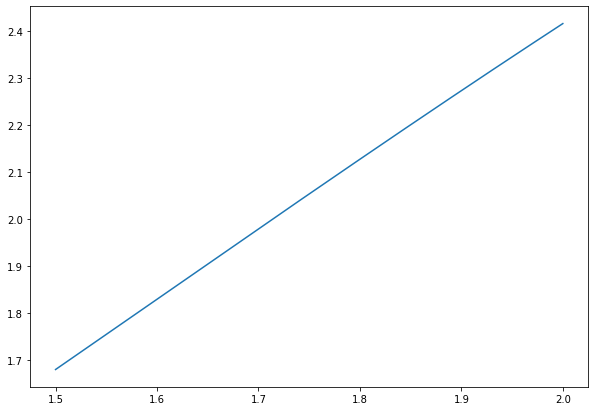

In [76]:
z = derivada(x)

plt.figure(figsize=(10,7))
plt.plot(x,z)
plt.show()

In [77]:
print("Max ",derivada(2)) # no puedo acotar la derivada con un m < 1. Busco otra funcion equivalente

Max  2.416146836547142


##Segunda variante: despejar x

Al no poder acotar la derivada por m < 1


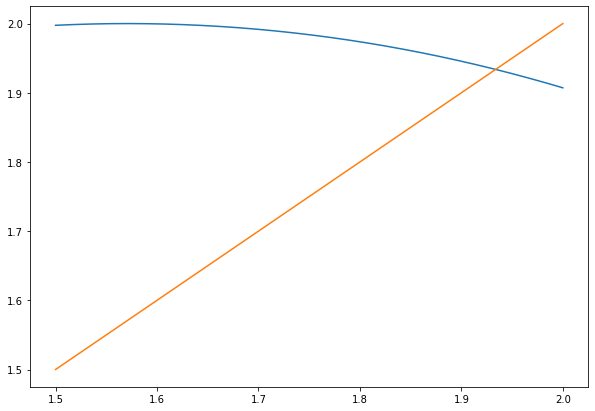

In [78]:
f = lambda x: 2*np.sqrt(np.sin(x)) # despejo x
derivada = lambda x: np.cos(x)/np.sqrt(np.sin(x))

y = f(x)

plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.plot(x,x)
plt.show()

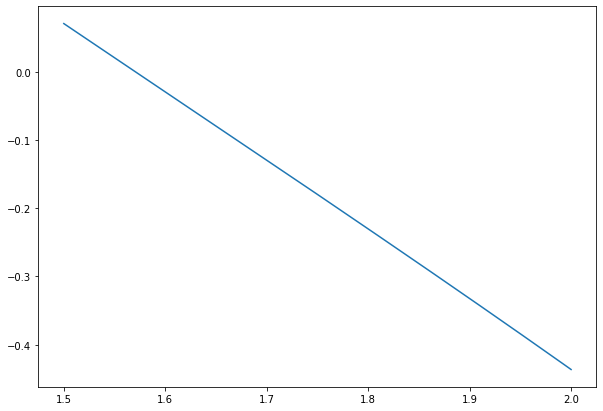

In [79]:
z = derivada(x)

plt.figure(figsize=(10,7))
plt.plot(x,z)
plt.show()

In [80]:
print("Max ",derivada(1.5)) # entonces tomo m = 0.08

Max  0.07082596729075064


In [81]:
semilla = 1.75
error_max = .5e-6
m = 0.08
punto_fijo(f,m,error_max,semilla) #por lo que bien redoneado seria x = 1.933753

Paso  1 	x:  1.9839213158529618 	Error:  0.02034098398721407
Paso  2 	x:  1.9140226717169333 	Error:  0.006078142968350307
Paso  3 	x:  1.9407975848131542 	Error:  0.0023282533127148637
Paso  4 	x:  1.9311415180524507 	Error:  0.0008396579791916103
Paso  5 	x:  1.9347094520216015 	Error:  0.00031025512775224195
Paso  6 	x:  1.933402357020561 	Error:  0.00011366043487309017
Paso  7 	x:  1.933882736256158 	Error:  4.1772107443214054e-05
Paso  8 	x:  1.9337063947150008 	Error:  1.5334047057138076e-05
Paso  9 	x:  1.93377115539908 	Error:  5.6313638329672795e-06
Paso  10 	x:  1.9337473760574622 	Error:  2.067768836329666e-06
Paso  11 	x:  1.9337561080498085 	Error:  7.593036822869815e-07
Paso  12 	x:  1.9337529016502306 	Error:  2.788173545955329e-07

Pasos totales:  12 	 valor estimado de x:  1.9337529016502306 	Error:  2.788173545955329e-07


##Estimacion de la cantidad de iteraciones

Llamando "a" al punto fijo, es decir, el punto tal que a = f(a) el error lo podemos calcular como:

|a-xk+1| <= m|a-xk|
|a-xk+1| <= m^2|a-xk-1| por ser |a-xk| <= m|a-xk-1|

siguiendo los mismos pasos:

|a-xk+1| <= m^k|a-x0|

teniendo en cuenta que |a-x0| <= m|x1-x0| resulta

Error: |a-xk+1| <= m^(k+1)||x1-x0|

Por lo tanto, calculado la anterior expresión puedo determinar aproximadamente cuantas iteraciones voy a tener que realizar

In [82]:
x0 = semilla
x1 = f(x0)

error_actual = 10
k = 1
while (error_actual > .5e-6):
  error_actual = (np.math.pow(m,k+1)/(1-m))*np.abs(x1-x0)
  k+=1
iteraciones = k-1 #resto lo que se sumo la ultima iteracion antes de no reingresar al while
print("\nCantidad de iteraciones estimadas: ",iteraciones," con una cota de error de ",error_actual)


Cantidad de iteraciones estimadas:  5  con una cota de error de  6.665333632930307e-08


In [83]:
k

6